<a href="https://colab.research.google.com/github/AkiraTerao/AT/blob/master/diffraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv
from scipy import signal
%matplotlib inline

Fraunhofer diffraction

In [2]:
def circ_fraun(x):
  I = (2*jv(1,k*x/(2*F))/(k*x/(2*F)))**2
  return I
def stair(x):
  if x < 0:
    return 1
  else:
    return 0
stairs = np.vectorize(stair)

In [3]:
F = 2 # z/D=F

#D = 1e-3 # Aperture size
A = 1
lam = 532e-9 # Wavelength
k = 2*np.pi/lam # Wave number

Reyleigh resolution:  1.298 um


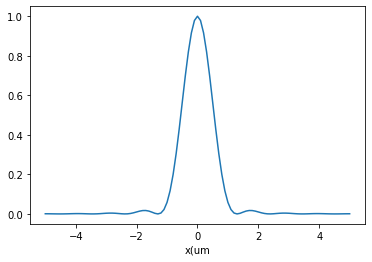

In [4]:
circ_fraun_I=np.vectorize(circ_fraun)
xmax = 5e-6
xmin = -xmax
dx = 1e-7
x = np.arange(xmin,xmax,dx)
frI = circ_fraun_I(x)
x1=1.22*lam*F
plt.plot(x*1e6,frI)
plt.xlabel('x(um')
print(f'Reyleigh resolution: {x1*1e6: 0.3f} um')

(-5.0, 5.0)

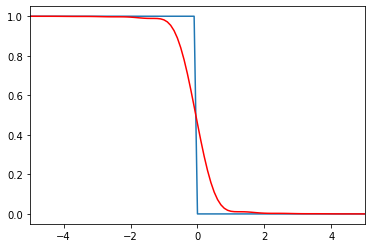

In [5]:
x2 = np.arange(-50e-6,50e-6,dx)
st = stairs(x2)
cv_st = np.convolve(st,frI,mode='same')
plt.plot(x2*1e6,st)
plt.plot(x2*1e6,cv_st/np.max(cv_st),'r')
plt.xlim([-5,5])

F:  2.0


Text(0.5, 0, '$x_q$ [um]')

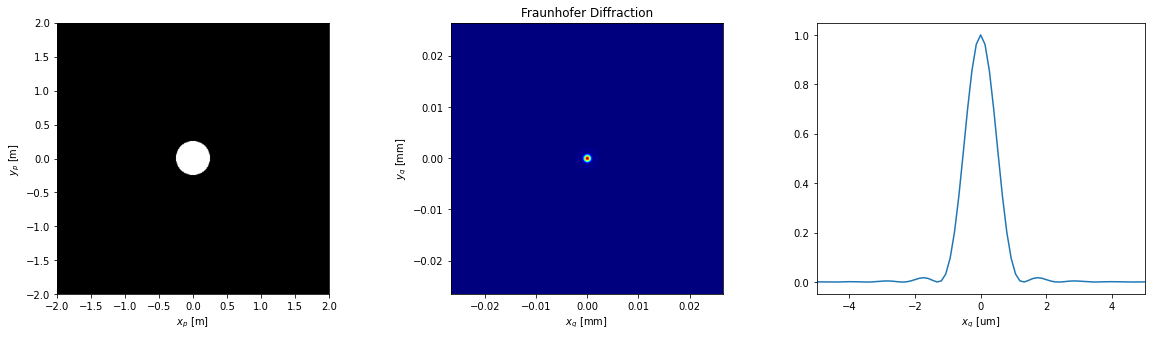

In [96]:
lam = 532e-9 # Wavelength
k = 2 * np.pi / lam # 波数
zq = 1 # 開口面から像面までの距離[m]
N =400 # グリッド分割数
r = 0.25 # 開口半径[m]
D = 4 # 開口面上の計算領域[m]
print('F: ',zq/(2*r))
# 開口面上の複素振幅を返す
def P(x, y):
    if x**2 + y**2 < r**2:
        return 1
    else:
        return 0

fscale = lam*zq

# グリッドの生成
X, Y = np.meshgrid(np.linspace(-D/2, D/2, num=N), np.linspace(-D/2, D/2, num=N))
Pv = np.vectorize(P)
Z = Pv(X, Y)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(Z, extent=[-D/2, D/2, -D/2, D/2],cmap='gray',vmax=1, vmin=0)
plt.xlabel('$x_p$ [m]')
plt.ylabel('$y_p$ [m]')

v = np.fft.fftfreq(N, d=D/N)
v = fscale * np.fft.fftshift(v)
# 単位は[mm]
extent= [1e3 * v[0], 1e3 * v[-1], 1e3 * v[0], 1e3 * v[-1]]

# 像面上の複素振幅を計算
U_fraun = np.fft.fft2(Z)
U_fraun = 1/(1.0j * lam * zq) * np.exp(1.0j * k * zq) * np.exp(1.0j * k * (v**2 + v**2)/(2*zq)) * np.fft.fftshift(U_fraun)

# 強度を計算
I_fraun = np.abs(U_fraun)**2
# 正規化
I_fraun = I_fraun / np.max(I_fraun)
plt.subplot(1,3,2)
plt.imshow(I_fraun, cmap='jet', extent=extent)
plt.xlabel('$x_q$ [mm]')
plt.ylabel('$y_q$ [mm]')
plt.title('Fraunhofer Diffraction')

plt.subplot(1,3,3)
st = int(N/2)
rag = 25
xx = v*1e6
plt.plot(xx,I_fraun[st,:])
plt.xlim([-5,5])
plt.xlabel('$x_q$ [um]')

F:  2.0


Text(0.5, 0, '$x_q$ [um]')

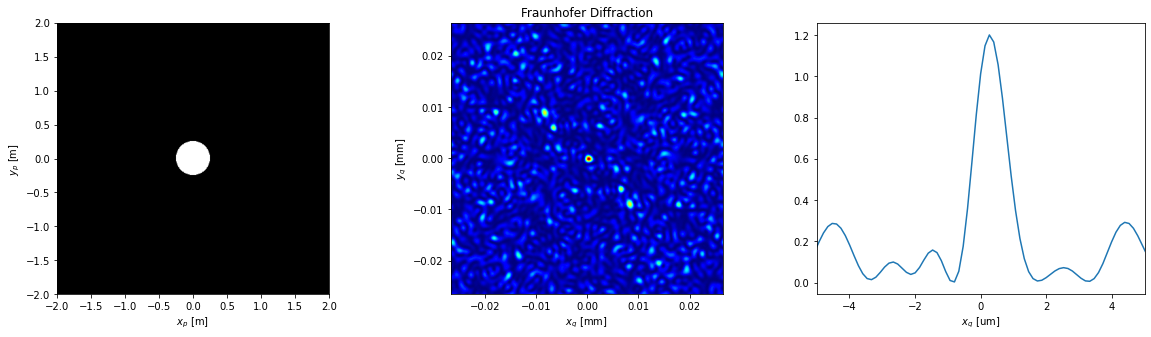

In [108]:
lam = 532e-9 # Wavelength
k = 2 * np.pi / lam # 波数
zq = 1 # 開口面から像面までの距離[m]
N =400 # グリッド分割数
r = 0.25 # 開口半径[m]
D = 4 # 開口面上の計算領域[m]
print('F: ',zq/(2*r))
# 開口面上の複素振幅を返す
def P(x, y):
    if x**2 + y**2 < r**2:
        return 1
    else:
        return 0

fscale = lam*zq

# グリッドの生成
X, Y = np.meshgrid(np.linspace(-D/2, D/2, num=N), np.linspace(-D/2, D/2, num=N))
Pv = np.vectorize(P)
Z = Pv(X, Y)

ph = np.random.normal(0,np.pi*2*2,size=(N,N))

Z2 = Z + Z*ph*1j

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.imshow(Z, extent=[-D/2, D/2, -D/2, D/2],cmap='gray',vmax=1, vmin=0)
plt.xlabel('$x_p$ [m]')
plt.ylabel('$y_p$ [m]')

v = np.fft.fftfreq(N, d=D/N)
v = fscale * np.fft.fftshift(v)
# 単位は[mm]
extent= [1e3 * v[0], 1e3 * v[-1], 1e3 * v[0], 1e3 * v[-1]]

# 像面上の複素振幅を計算
U_fraun2 = np.fft.fft2(Z2)
U_fraun2 = 1/(1.0j * lam * zq) * np.exp(1.0j * k * zq) * np.exp(1.0j * k * (v**2 + v**2)/(2*zq)) * np.fft.fftshift(U_fraun2)

# 強度を計算
I_fraun2 = np.abs(U_fraun2)**2
# 正規化
I_fraun2 = I_fraun2 / np.max(I_fraun)
plt.subplot(1,3,2)
plt.imshow(I_fraun2, cmap='jet', extent=extent)
plt.xlabel('$x_q$ [mm]')
plt.ylabel('$y_q$ [mm]')
plt.title('Fraunhofer Diffraction')

plt.subplot(1,3,3)
st = int(N/2)
rag = 25
xx = v*1e6
plt.plot(xx,I_fraun2[st,:])
plt.xlim([-5,5])
plt.xlabel('$x_q$ [um]')

Contrast:  0.02


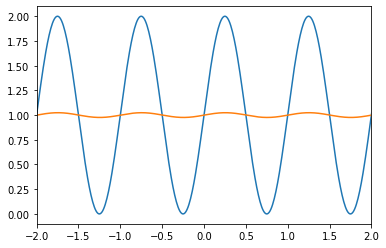

In [ ]:
x3 = np.arange(-10e-3,10e-3,1e-5)
pat = np.sin(2*np.pi/1e-3*x3)+1
samp = 4.1e-3
num = int(samp/1e-5)
kernel = np.ones(num)/num
cov_pat = np.convolve(pat,kernel,mode='same')
plt.plot(x3*1e3,pat)
plt.plot(x3*1e3,cov_pat)
xr = 2e-3
plt.xlim([-xr*1e3,xr*1e3])

Imax = np.max(cov_pat[np.abs(x3)<xr])
Imin = np.min(cov_pat[np.abs(x3)<xr])
cnt = (Imax-Imin)/(Imax+Imin)
print(f'Contrast: {cnt: 0.2f}')

Contrast:  0.07


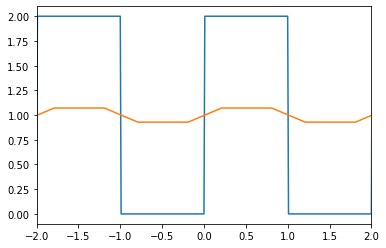

In [ ]:
x3 = np.arange(-10e-3,10e-3,1e-5)
rec = signal.square(2*np.pi*x3/2e-3)+1
samp = 5.6e-3
num = int(samp/1e-5)
kernel = np.ones(num)/num
cov_rec = np.convolve(rec,kernel,mode='same')
plt.plot(x3*1e3,rec)
plt.plot(x3*1e3,cov_rec)
xr = 2e-3
plt.xlim([-xr*1e3,xr*1e3])

Imax = np.max(cov_rec[np.abs(x3)<xr])
Imin = np.min(cov_rec[np.abs(x3)<xr])
cnt = (Imax-Imin)/(Imax+Imin)
print(f'Contrast: {cnt: 0.2f}')

(-5.0, 5.0)

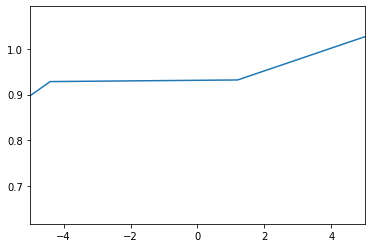

In [ ]:
sp=0
resample=cov_rec[sp:-1:num]
rx=x3[sp:-1:num]
plt.plot(rx*1e3,resample)
#plt.plot(x3*1e3,cov_rec)
#plt.plot(x3*1e3,rec)
plt.xlim([-5,5])
#plt.ylim([0.9,1.1])

Contranst:  0.05


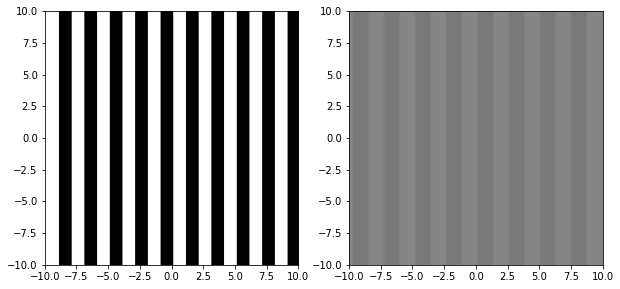

In [ ]:
x = np.arange(-10e-3,10e-3,1e-4)

extent= [-10,10,-10,10]
rec = (signal.square(2*np.pi/2.0e-3*x)+1)/2
rec2d = np.tile(rec,(200,1))
samp = 3.8e-3
num = int(samp/1e-4)
ker2d = np.ones([num,num])/num**2
rec2d_r = signal.convolve2d(rec2d, ker2d, boundary='symm', mode='valid')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(rec2d,cmap='gray',vmax=1,vmin=0,extent=extent)
plt.subplot(1,2,2)
plt.imshow(rec2d_r,cmap='gray',vmax=1,vmin=0,extent=extent)

Imax=np.max(rec2d_r[100,80:120])
Imin=np.min(rec2d_r[100,80:120])
cnt =(Imax-Imin)/(Imax+Imin)
print(f'Contranst: {cnt: 0.2f}')

38


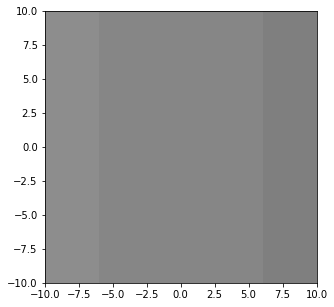

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(rec2d_r[0:-1:num,0:-1:num],cmap='gray',vmax=1,vmin=0.0,extent=extent)
print(num)

In [ ]:
np.shape(rec2d_r[0:-1:num,0:-1:num])

(4, 4)